### Import data

With linreg, can accurately value players better & minimise risk from gut-feeling evaluation of players. Also, initial observations noted how salary may not necessarily contribute to better performance. Hence, we can identify what the undervalued, overlooked factors for player performance could be.

For more info on plot point styling, click [here](http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r).

'data.frame':	420 obs. of  17 variables:
 $ Team        : Factor w/ 34 levels "ANA","ARI","ATL",..: 2 3 4 5 6 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 2 2 1 1 2 1 2 1 2 1 ...
 $ Year        : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Games       : int  162 162 162 162 162 162 162 162 162 162 ...
 $ W           : int  81 94 93 69 61 85 97 68 64 88 ...
 $ RS          : int  734 700 712 734 613 748 669 667 758 726 ...
 $ RA          : int  688 600 705 806 759 676 588 845 890 670 ...
 $ OBP         : num  0.328 0.32 0.311 0.315 0.302 0.318 0.315 0.324 0.33 0.335 ...
 $ SLG         : num  0.418 0.389 0.417 0.415 0.378 0.422 0.411 0.381 0.436 0.422 ...
 $ BA          : num  0.259 0.247 0.247 0.26 0.24 0.255 0.251 0.251 0.274 0.268 ...
 $ OPS         : num  0.746 0.709 0.728 0.73 0.68 0.74 0.726 0.705 0.766 0.757 ...
 $ OOBP        : num  0.317 0.306 0.315 0.331 0.335 0.319 0.305 0.336 0.357 0.314 ...
 $ OSLG        : num  0.415 0.378 0.403 0.428 0.42

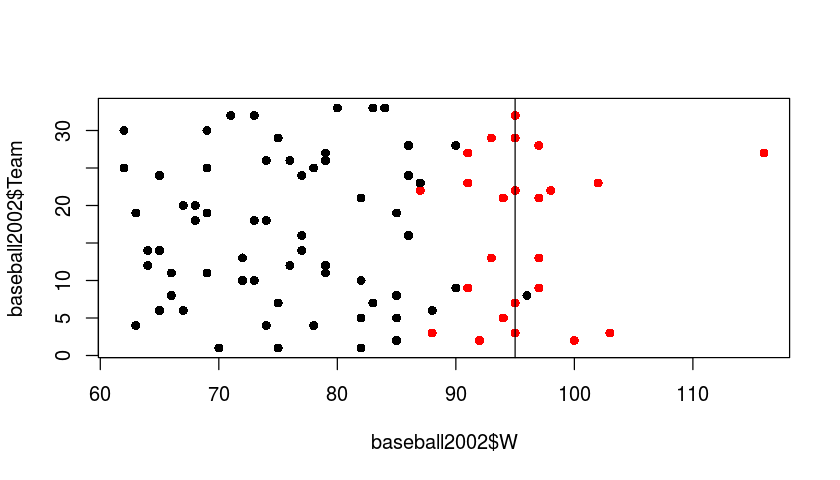

In [6]:
options(repr.plot.width=7, repr.plot.height=4) # resize IRkernel plot size

baseball <- read.csv("csv/baseball.csv")
str(baseball) # 420 blazeit observations

# define training set
baseball2002 <- subset(baseball, Year < 2002)
# str(baseball2002) # 90 observations
plot(baseball2002$W, baseball2002$Team, col=ifelse(baseball2002$Playoffs==1, "red", "black"), pch=16)
abline(v=95) # need at least 95 wins for playoffs

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2460  0.2610  0.2670  0.2684  0.2765  0.2940 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3800  0.4153  0.4315  0.4324  0.4507  0.4830 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3130  0.3290  0.3410  0.3405  0.3518  0.3730 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6990  0.7452  0.7740  0.7728  0.8007  0.8400 

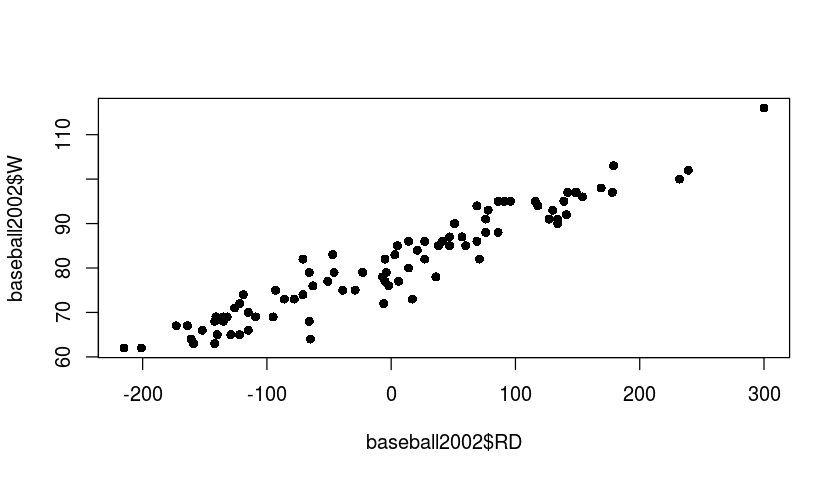

In [8]:
# now we want to build a team that can get at least 95 wins, how then?
baseball2002$RD <- baseball2002$RS-baseball2002$RA
plot(baseball2002$RD, baseball2002$W, pch=16)
# https://faculty.washington.edu/jmiyamot/p548/rstudio.shortcuts.pdf
abline(model5)
model5 <- lm(W~RD, data=baseball2002)
# W = 80.92 + 0.099D

# most commonly used statistics for playyer batting skill
summary(baseball2002$BA)
summary(baseball2002$SLG)
summary(baseball2002$OBP)
summary(baseball2002$OPS)

model6 <- lm(RS~OBP+SLG, data=baseball2002)
model7 <- lm(RS~OBP+SLG+BA, data=baseball2002)